In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel ('bank-additional-full.xlsx')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data checking and cleaning

In [2]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [3]:
df =df.drop_duplicates()
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df =df.drop(['euribor3m'], axis=1)

In [7]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
7906,57,housemaid,married,basic.4y,no,yes,no,telephone,jun,mon,210,2,999,0,nonexistent,1.4,94.465,-41.8,5228.1,no
35092,53,admin.,married,high.school,no,yes,no,cellular,may,fri,358,1,999,1,failure,-1.8,92.893,-46.2,5099.1,no
15502,26,services,single,high.school,unknown,yes,no,cellular,jul,fri,34,3,999,0,nonexistent,1.4,93.918,-42.7,5228.1,no
7312,36,entrepreneur,married,university.degree,no,yes,no,telephone,may,thu,23,15,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
30874,34,services,married,high.school,unknown,no,no,cellular,may,tue,245,5,999,0,nonexistent,-1.8,92.893,-46.2,5099.1,no


In [8]:
no_yes =len(df[df['y'] == 'yes'])

In [9]:
print(f'train shape: {df.shape}; y=yes: {no_yes}')

train shape: (41176, 20); y=yes: 4639


# Initial correlation on numeric data

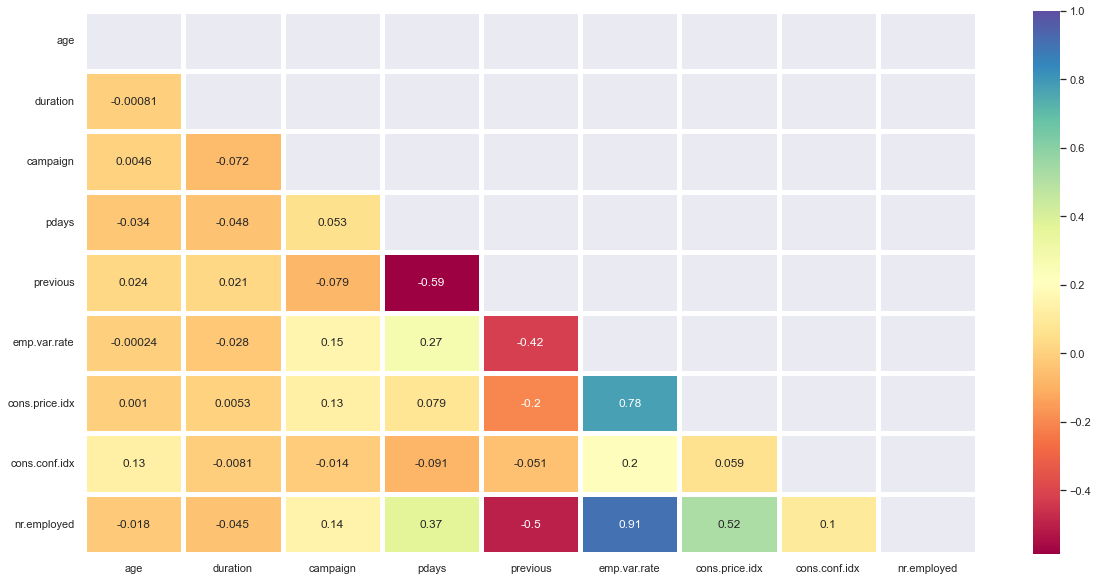

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
sns.set(rc={'figure.figsize':(20,10)}) 
mask = np.triu(np.ones_like(correlation_matrix), k=0) 
sns.heatmap(correlation_matrix, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)
pass

# Data normalization

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

black_list = ['duration', 'y']
feats = [x for x in df if x not in black_list]

x =df[feats].to_numpy()
y = df['y'].to_numpy()
df_dummies = pd.get_dummies(df)
df_dummies





,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,5191.0,1,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,4963.6,0,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,4963.6,0,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,4963.6,0,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,4963.6,0,...,1,0,0,0,0,0,1,0,0,1


# Correlation of standarized data

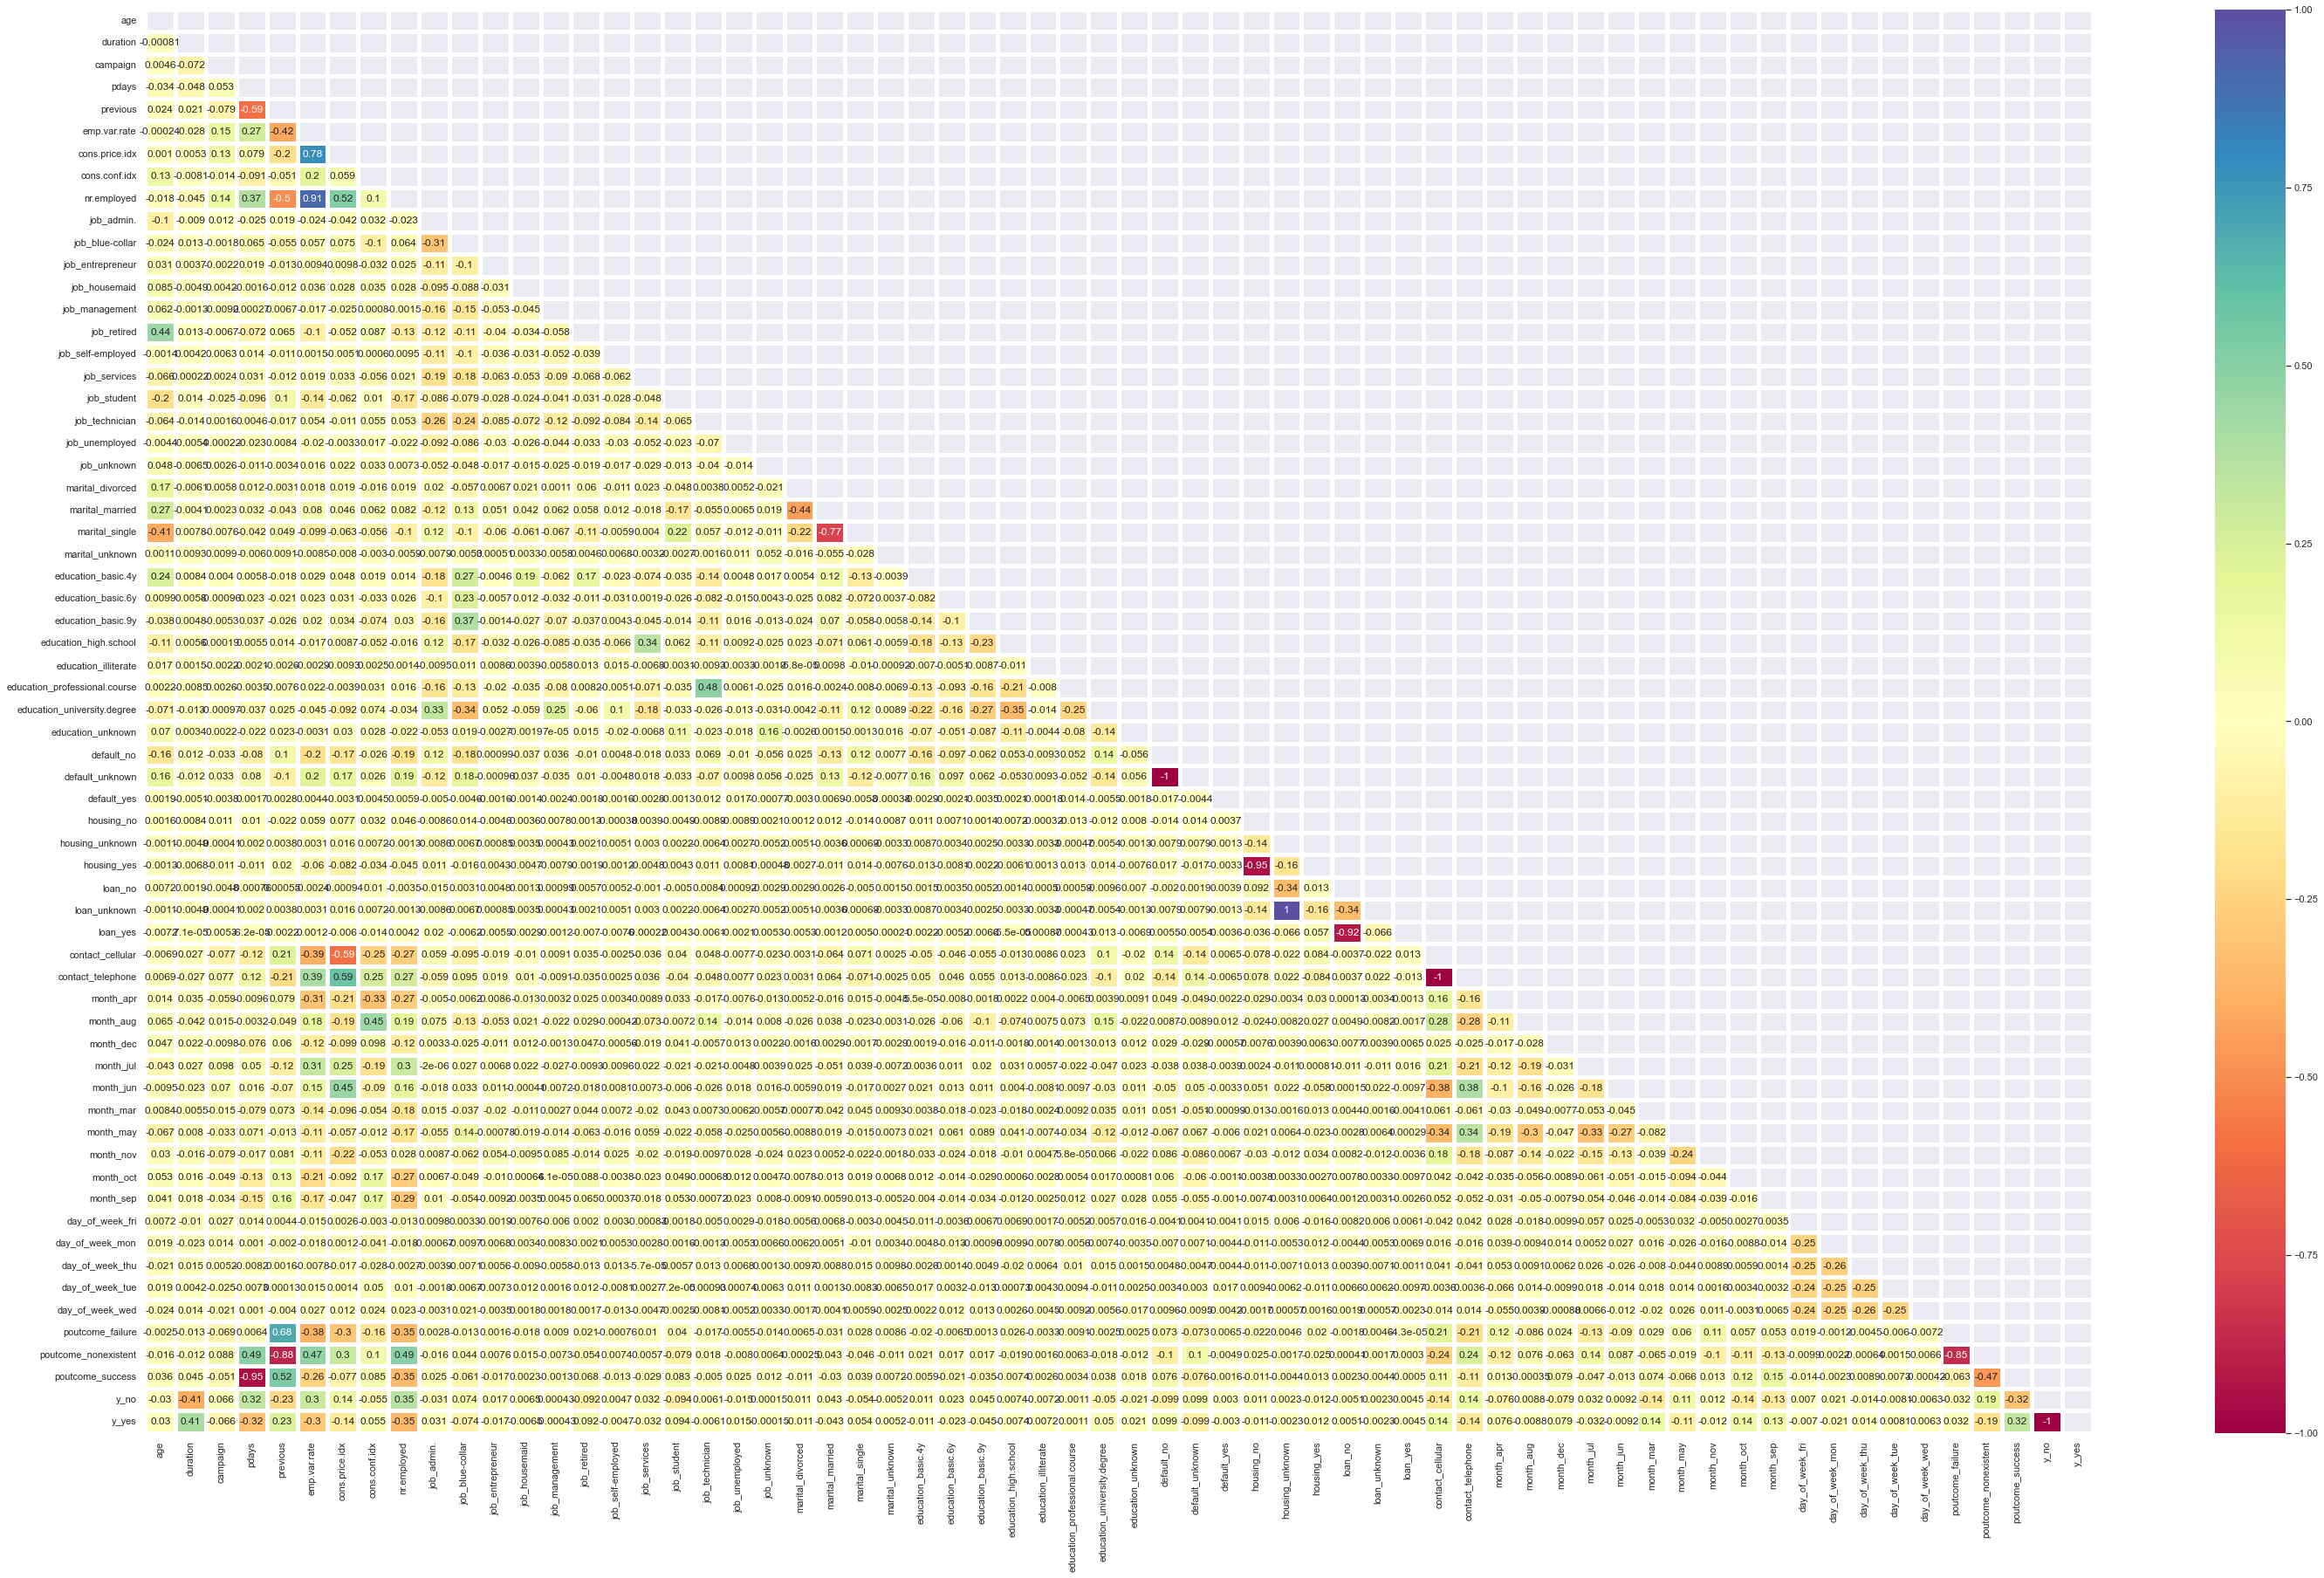

In [12]:
correlation_matrix = df_dummies.corr()
sns.set(rc={'figure.figsize':(50,30)}) 
mask = np.triu(np.ones_like(correlation_matrix), k=0) 
sns.heatmap(correlation_matrix, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)
pass

# Feature selection

Remove correlated data

In [13]:
M = np.tril(correlation_matrix.to_numpy(), k=-1) 
r, c = np.where(np.abs(M)>=0.8)# określenie indeksów wierszy i kolumn dla których |R|>=0.8

c = np.unique(c) 
c # indeksy zmiennych, które nalezy usunąć

array([ 3,  4,  5, 33, 36, 37, 39, 42, 59, 62], dtype=int64)

In [14]:
for count, feature in enumerate(df_dummies.columns):
    print(count, feature)

0 age
1 duration
2 campaign
3 pdays
4 previous
5 emp.var.rate
6 cons.price.idx
7 cons.conf.idx
8 nr.employed
9 job_admin.
10 job_blue-collar
11 job_entrepreneur
12 job_housemaid
13 job_management
14 job_retired
15 job_self-employed
16 job_services
17 job_student
18 job_technician
19 job_unemployed
20 job_unknown
21 marital_divorced
22 marital_married
23 marital_single
24 marital_unknown
25 education_basic.4y
26 education_basic.6y
27 education_basic.9y
28 education_high.school
29 education_illiterate
30 education_professional.course
31 education_university.degree
32 education_unknown
33 default_no
34 default_unknown
35 default_yes
36 housing_no
37 housing_unknown
38 housing_yes
39 loan_no
40 loan_unknown
41 loan_yes
42 contact_cellular
43 contact_telephone
44 month_apr
45 month_aug
46 month_dec
47 month_jul
48 month_jun
49 month_mar
50 month_may
51 month_nov
52 month_oct
53 month_sep
54 day_of_week_fri
55 day_of_week_mon
56 day_of_week_thu
57 day_of_week_tue
58 day_of_week_wed
59 poutco

# Features not correlated

In [15]:
df_dummies= df_dummies.drop(['pdays', 'previous', 'emp.var.rate', 'default_no', 'housing_no', 'housing_unknown', 'loan_no', 'contact_cellular', 'poutcome_failure'], axis=1)

black_list = ['duration', 'y_no', 'y_yes']
feats = [x for x in df_dummies if x not in black_list]


# Test of models with selection of the best features

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [21]:
X = df_dummies[feats].to_numpy()
y = df_dummies['y_yes'].to_numpy() 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set: %d\nTest set: %d' % (X_train.shape[0], X_test.shape[0]))

Training set: 32940
Test set: 8236


In [12]:
pip install python-utils 
# from utils import calculating_metrics
 
# rf_user_param ={
#     "max_depth": 6,
#     "n_estimators": 250,
#     "n_jobs":-1
# }
 
# model_rf = RandomForestClassifier(**rf_user_param)
# model_rf.fit(X_train ,y_train)
 
# calculating_metrics(model_rf, X_train, y_train, X_test, y_test)

SyntaxError: invalid syntax (Temp/ipykernel_25316/228761709.py, line 1)